In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [21]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = np.array(data[["WeekofPurchase","StoreID","PriceCH","PriceMM","DiscCH","DiscMM","SpecialCH","SpecialMM","LoyalCH","SalePriceMM","SalePriceCH","PriceDiff","PctDiscMM","PctDiscCH","ListPriceDiff","STORE"]])
Y1 = np.array(data['Purchase'])
np.shape(X)
for i in range(16):
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

In [22]:
rangoC = np.logspace(0.02,0.9,50)
errorCLCV = []
errorCRCV = []
for i in range(len(rangoC)):
    clf = SVC(C=rangoC[i],kernel='linear',gamma='auto')
    rad = SVC(C=rangoC[i],kernel='rbf',gamma='auto')
    scoresCLF = cross_val_score(clf, X, Y1, cv=5)
    scoresRAD = cross_val_score(rad, X, Y1, cv=5)
    errorCLCV.append(np.mean(scoresCLF))
    errorCRCV.append(np.mean(scoresRAD))

Para el Lineal el mejor C es[0.75632653]


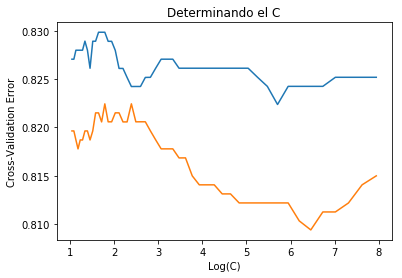

In [23]:
plt.plot(rangoC,errorCLCV)
plt.plot(rangoC,errorCRCV)
plt.xlabel('Log(C)')
plt.ylabel('Cross-Validation Error')
plt.title('Determinando el C')
print("Para el Lineal el mejor C es" + np.str(np.log10(rangoC[errorCLCV == min(errorCLCV)])))


In [24]:
rangoG = np.logspace(0.2,0.9,50)
errorGLCV = []
errorGRCV = []
for i in range(len(rangoG)):
    clf = SVC(C=0.75632653,kernel='linear',gamma=rangoG[i])
    rad = SVC(C=0.81020408,kernel='rbf',gamma=rangoG[i])
    scoresCLF = cross_val_score(clf, X, Y1, cv=5)
    scoresRAD = cross_val_score(rad, X, Y1, cv=5)
    errorGLCV.append(np.mean(scoresCLF))
    errorGRCV.append(np.mean(scoresRAD))

Para el Radial el mejor Gamma es[0.9]


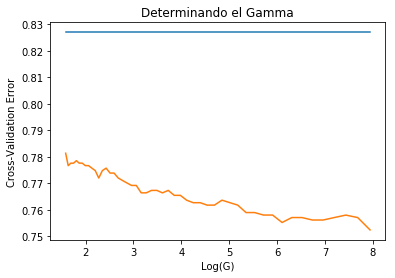

In [25]:
plt.plot(rangoG,errorGLCV)
plt.plot(rangoG,errorGRCV)
plt.xlabel('Log(G)')
plt.ylabel('Cross-Validation Error')
plt.title('Determinando el Gamma')
print("Para el Radial el mejor Gamma es" + np.str(np.log10(rangoG[errorGRCV == min(errorGRCV)])))


In [36]:
JJ = pd.read_csv('spam7.csv')
JJ = JJ.dropna()
Xne = np.array(JJ[["crl.tot","dollar","bang","money","n000","make"]])
Y1ne = np.array(JJ['yesno'])
Y1ne[Y1ne=='n'] = 0
Y1ne[Y1ne=='y'] = 1
np.shape(Xne)
print(Y1ne)
#for i in range(6):
#    Xne[:,i] = (Xne[:,i]-np.mean(Xne[:,i]))/np.std(Xne[:,i])

[1 1 1 ... 0 0 0]


In [40]:
rangoC = np.logspace(0.02,0.9,50)
errorCLCV = []
for i in range(len(rangoC)):
    clf = SVC(C=rangoC[i],kernel='linear',gamma='auto')
    scoresCLF = cross_val_score(clf, Xne, Y1ne, cv=5)
    errorCLCV.append(np.mean(scoresCLF))
print("Para el Lineal el mejor C es" + np.str(np.log10(rangoC[errorCLCV == min(errorCLCV)])))

Para el Lineal el mejor C es[0.75632653]


El mismo error desconocido de la ultima vez, no importa si le cambio entre dataframe o np.array no me permite correrlo... Frustracion again

In [ ]:
errorGRCV = []
for i in range(len(rangoG)):
    rad = SVC(C=min,kernel='rbf',gamma=rangoG[i])
    scoresCLF = cross_val_score(clf, X, Y1, cv=5)
    scoresRAD = cross_val_score(rad, X, Y1, cv=5)
    errorGLCV.append(np.mean(scoresCLF))
    errorGRCV.append(np.mean(scoresRAD))